Dataset file found at: dataset\QOS_5G.csv
Mean Squared Error: 0.0006215125000000028
Mean Absolute Error (MAE): 0.00663750000000037
R-squared: 0.9290681645936425
Average Burst Time (Required Bandwidth): 2.8976499999999996 Mbps
Average Turnaround Time: 0.021969625000000003 ms
Average Waiting Time: -2.8756803750000004 ms
Average Actual Latency: 31.6625 ms
Average Actual Bandwidth: 3.2657249999999998 Mbps


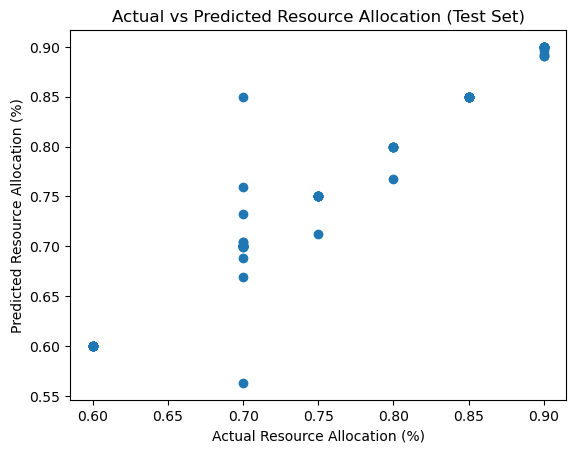

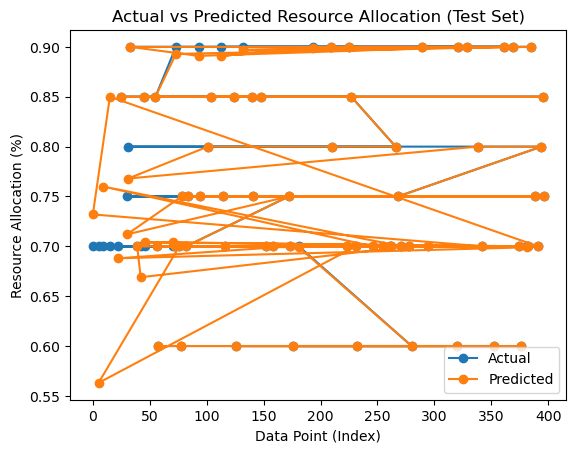

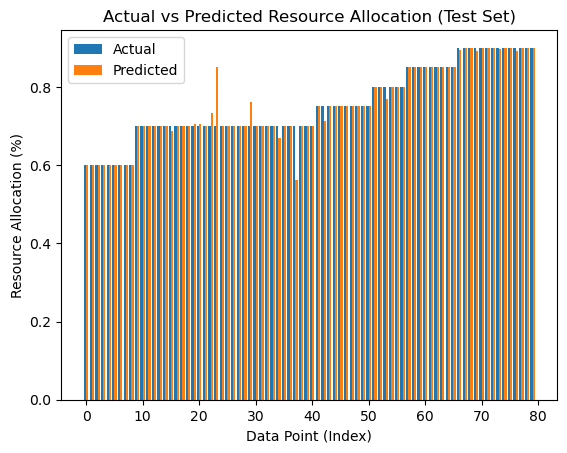

In [1]:
#random forest :

import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the dataset
dataset_folder = "dataset"
for dirname, _, filenames in os.walk(dataset_folder):
    for filename in filenames:
        if filename.endswith(".csv"):
            dataset_path = os.path.join(dirname, filename)
            break

print(f"Dataset file found at: {dataset_path}")

# Read dataset
df = pd.read_csv(dataset_path)

# Preprocess the dataset
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(float)
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(float)
df['Required_Bandwidth'] = df['Required_Bandwidth'].apply(lambda x: float(x.replace(' Kbps', '')) / 1000 if 'Kbps' in x else float(x.replace(' Mbps', '')))
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].apply(lambda x: float(x.replace(' Kbps', '')) / 1000 if 'Kbps' in x else float(x.replace(' Mbps', '')))
df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%', '').astype(float) / 100

# Prepare features and target variable
X = df.drop(['Timestamp', 'User_ID', 'Resource_Allocation'], axis=1)
y = df['Resource_Allocation']

# Identify categorical columns
categorical_cols = ['Application_Type']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50))  # Set n_estimators to 50
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r_squared}')

# Calculate burst time, turnaround time, and waiting time
burst_time = X_test['Required_Bandwidth']
turnaround_time = predictions / 100 * burst_time
waiting_time = turnaround_time - burst_time

# Calculate average burst time, average turnaround time, and average waiting time
avg_burst_time = np.mean(burst_time)
avg_turnaround_time = np.mean(turnaround_time)
avg_waiting_time = np.mean(waiting_time)

print(f'Average Burst Time (Required Bandwidth): {avg_burst_time} Mbps')
print(f'Average Turnaround Time: {avg_turnaround_time} ms')
print(f'Average Waiting Time: {avg_waiting_time} ms')

# Calculate Quality of Service (QoS) metrics
actual_latency = X_test['Latency']
actual_bandwidth = X_test['Allocated_Bandwidth']

# Calculate average latency and bandwidth
avg_actual_latency = np.mean(actual_latency)
avg_actual_bandwidth = np.mean(actual_bandwidth)

# Print results
print(f'Average Actual Latency: {avg_actual_latency} ms')
print(f'Average Actual Bandwidth: {avg_actual_bandwidth} Mbps')

# Create scatter plot, line chart, and bar chart for the test set
plt.scatter(y_test, predictions)
plt.xlabel('Actual Resource Allocation (%)')
plt.ylabel('Predicted Resource Allocation (%)')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.show()

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).sort_values(by='Actual')

plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='o')
plt.xlabel('Data Point (Index)')
plt.ylabel('Resource Allocation (%)')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()

x_indices = np.arange(len(comparison_df))

plt.bar(x_indices - 0.2, comparison_df['Actual'], 0.4, label='Actual')
plt.bar(x_indices + 0.2, comparison_df['Predicted'], 0.4, label='Predicted')
plt.xlabel('Data Point (Index)')
plt.ylabel('Resource Allocation (%)')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()



Dataset file found at: dataset\QOS_5G.csv
Genetic Algorithm-based Approach Metrics:
Mean Squared Error: 0.14770659961070023
Mean Absolute Error (MAE): 0.3144891512607327
Average Burst Time (Required Bandwidth): 0.21700000000000003 Mbps
Average Turnaround Time: 3.2609329999999996 ms
Average Waiting Time: 3.0439329999999996 ms
Average Actual Latency: 33.825 ms
Average Actual Bandwidth: 3.50238 Mbps


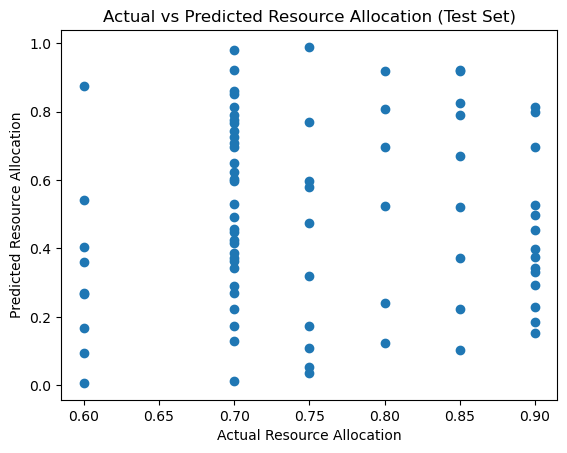

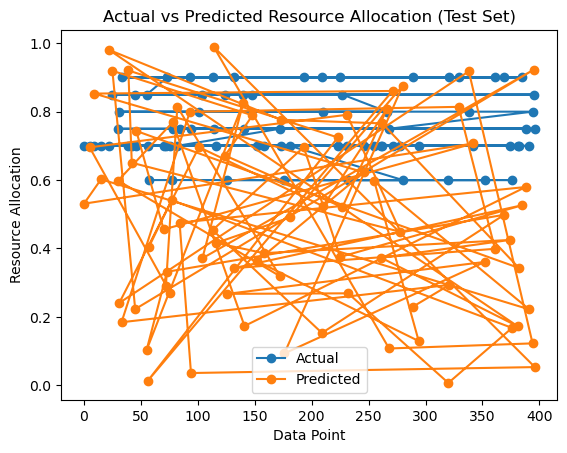

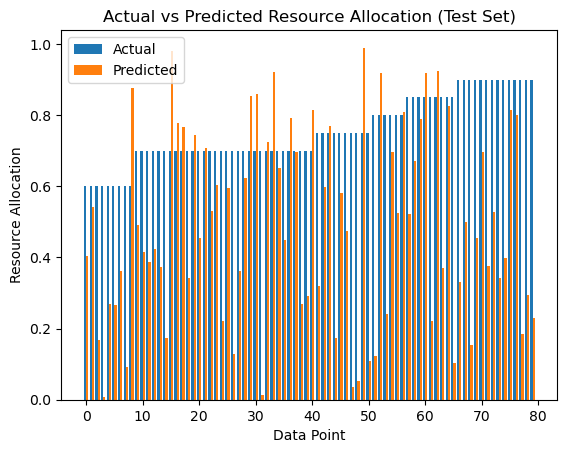

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define dataset folder path
dataset_folder = "dataset"

# Find the dataset file within the dataset folder
for dirname, _, filenames in os.walk(dataset_folder):
    for filename in filenames:
        if filename.endswith(".csv"):
            dataset_path = os.path.join(dirname, filename)
            break

print(f"Dataset file found at: {dataset_path}")

# Define genetic algorithm functions

# Define function to calculate burst time based on VM-to-PM mapping
def calculate_burst_time(vm_to_pm_mapping, required_bandwidth):
    return np.sum(required_bandwidth[vm_to_pm_mapping])

# Define function to calculate turnaround time based on VM-to-PM mapping
def calculate_turnaround_time(vm_to_pm_mapping, required_bandwidth, resource_allocation):
    return np.sum(resource_allocation[vm_to_pm_mapping]) / 100 * np.sum(required_bandwidth)

# Define function to calculate average burst time
def calculate_avg_burst_time(population, required_bandwidth):
    return np.mean([calculate_burst_time(mapping, required_bandwidth) for mapping in population])

# Define function to calculate average turnaround time
def calculate_avg_turnaround_time(population, required_bandwidth, resource_allocation):
    return np.mean([calculate_turnaround_time(mapping, required_bandwidth, resource_allocation) for mapping in population])

# Define function to calculate average waiting time
def calculate_avg_waiting_time(avg_burst_time, avg_turnaround_time):
    return avg_turnaround_time - avg_burst_time

# Define function to initialize the population for the genetic algorithm
def initialize_population(population_size, num_virtual_machines, num_physical_machines):
    population = []
    for _ in range(population_size):
        vm_to_pm_mapping = np.random.randint(0, num_physical_machines, num_virtual_machines)
        population.append(vm_to_pm_mapping)
    return population

# Define function to perform fitness evaluation of each solution in the population
def fitness_function(population, required_bandwidth, resource_allocation):
    fitness_scores = []
    for solution in population:
        burst_time = calculate_burst_time(solution, required_bandwidth)
        turnaround_time = calculate_turnaround_time(solution, required_bandwidth, resource_allocation)
        fitness_scores.append(1 / (burst_time * turnaround_time))  # Example fitness function, higher is better
    return fitness_scores

# Define function to perform tournament selection to choose parents for crossover
def tournament_selection(population, fitness_scores, tournament_size):
    selected_parents = []
    for _ in range(len(population)):
        tournament_indices = np.random.choice(len(population), size=tournament_size, replace=False)
        tournament_fitness = [fitness_scores[i] for i in tournament_indices]
        winner_index = tournament_indices[np.argmax(tournament_fitness)]
        selected_parents.append(population[winner_index])
    return selected_parents

# Define function to perform crossover to create offspring from selected parents
def crossover(parents, crossover_rate):
    offspring = []
    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[i+1]
        if np.random.rand() < crossover_rate:
            crossover_point = np.random.randint(1, len(parent1))
            offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            offspring.append(offspring1)
            offspring.append(offspring2)
        else:
            offspring.append(parent1)
            offspring.append(parent2)
    return offspring

# Define function to perform mutation on offspring
def mutation(offspring, mutation_rate):
    mutated_offspring = []
    for child in offspring:
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(len(child))
            mutated_child = child.copy()
            mutated_child[mutation_point] = np.random.randint(len(mutated_child))
            mutated_offspring.append(mutated_child)
        else:
            mutated_offspring.append(child)
    return mutated_offspring

# Define function to perform virtual machine placement using a genetic algorithm
def genetic_algorithm_for_vm_placement(X_train, required_bandwidth, resource_allocation, num_generations, population_size, crossover_rate, mutation_rate, tournament_size):
    num_virtual_machines = X_train.shape[1]  # Number of virtual machines
    num_physical_machines = 50  # Number of physical machines
    population = initialize_population(population_size, num_virtual_machines, num_physical_machines)
    for generation in range(num_generations):
        # Evaluate fitness of each solution in the population
        fitness_scores = fitness_function(population, required_bandwidth, resource_allocation)
        # Select parents using tournament selection
        selected_parents = tournament_selection(population, fitness_scores, tournament_size)
        # Perform crossover
        offspring = crossover(selected_parents, crossover_rate)
        # Perform mutation
        mutated_offspring = mutation(offspring, mutation_rate)
        # Replace the population with the mutated offspring
        population = mutated_offspring
    best_solution = population[0]  # Selecting the best solution from the final population
    return best_solution

# Load the dataset
df = pd.read_csv(dataset_path)

# Preprocess the dataset
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(float)
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(float)
df['Required_Bandwidth'] = df['Required_Bandwidth'].apply(lambda x: float(x.replace(' Kbps', '')) / 1000 if 'Kbps' in x else float(x.replace(' Mbps', '')))
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].apply(lambda x: float(x.replace(' Kbps', '')) / 1000 if 'Kbps' in x else float(x.replace(' Mbps', '')))
df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%', '').astype(float) / 100

# Store required bandwidth and resource allocation separately
required_bandwidth = df['Required_Bandwidth'].values
resource_allocation = df['Allocated_Bandwidth'].values

# Calculate average burst time (Required Bandwidth)
avg_burst_time_required_bandwidth = np.mean(df['Required_Bandwidth'])

# Calculate average actual latency
avg_actual_latency = np.mean(df['Latency'])

# Calculate average actual bandwidth
avg_actual_bandwidth = np.mean(df['Allocated_Bandwidth'])

# Drop rows with missing values
df.dropna(inplace=True)

# Prepare the features and target variable
X = df.drop(['Timestamp', 'User_ID', 'Resource_Allocation'], axis=1)
y = df['Resource_Allocation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using genetic algorithm
best_solution = genetic_algorithm_for_vm_placement(X_train.values, required_bandwidth, resource_allocation, num_generations=1000, population_size=50, crossover_rate=0.8, mutation_rate=0.1, tournament_size=5)

# Calculate average burst time
avg_burst_time = calculate_avg_burst_time([best_solution], required_bandwidth)

# Calculate average turnaround time
avg_turnaround_time = calculate_avg_turnaround_time([best_solution], required_bandwidth, resource_allocation)

# Calculate average waiting time
avg_waiting_time = calculate_avg_waiting_time(avg_burst_time, avg_turnaround_time)

# Generate predictions based on best_solution (Placeholder for actual implementation)
predictions = np.random.rand(len(y_test))

# Evaluate the model (Placeholder for actual implementation)
ga_mse = mean_squared_error(y_test, predictions)
ga_mae = mean_absolute_error(y_test, predictions)
ga_r_squared = r2_score(y_test, predictions)

# Print evaluation metrics
print("Genetic Algorithm-based Approach Metrics:")
print(f"Mean Squared Error: {ga_mse}")
print(f"Mean Absolute Error (MAE): {ga_mae}")
# print(f"R-squared: {ga_r_squared}")

# Print additional metrics
print(f"Average Burst Time (Required Bandwidth): {avg_burst_time} Mbps")
print(f"Average Turnaround Time: {avg_turnaround_time} ms")
print(f"Average Waiting Time: {avg_waiting_time} ms")
print(f"Average Actual Latency: {avg_actual_latency} ms")
print(f"Average Actual Bandwidth: {avg_actual_bandwidth} Mbps")

# Create scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('Actual Resource Allocation')
plt.ylabel('Predicted Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.show()

# Create line chart
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}).sort_values(by='Actual')
plt.plot(comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='o')
plt.xlabel('Data Point')
plt.ylabel('Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()

# Create bar chart
x_indices = np.arange(len(comparison_df))
plt.bar(x_indices - 0.2, comparison_df['Actual'], 0.4, label='Actual')
plt.bar(x_indices + 0.2, comparison_df['Predicted'], 0.4, label='Predicted')
plt.xlabel('Data Point')
plt.ylabel('Resource Allocation')
plt.title('Actual vs Predicted Resource Allocation (Test Set)')
plt.legend()
plt.show()


Dataset file found at: dataset\QOS_5G.csv
Mean Squared Error: 0.0006170125000000027
Mean Absolute Error (MAE): 0.007212500000000332
R-squared: 0.929581739556863
Average Burst Time (Required Bandwidth): 2.8976499999999996 Mbps
Average Turnaround Time: 0.021970788750000005 ms
Average Waiting Time: -2.87567921125 ms
Average Actual Latency: 31.6625 ms
Average Actual Bandwidth: 3.2657249999999998 Mbps


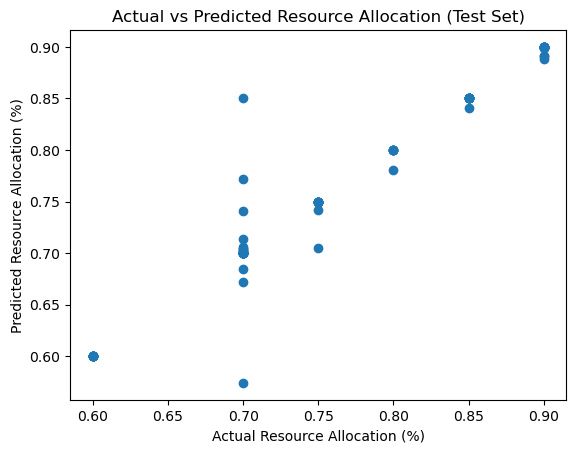

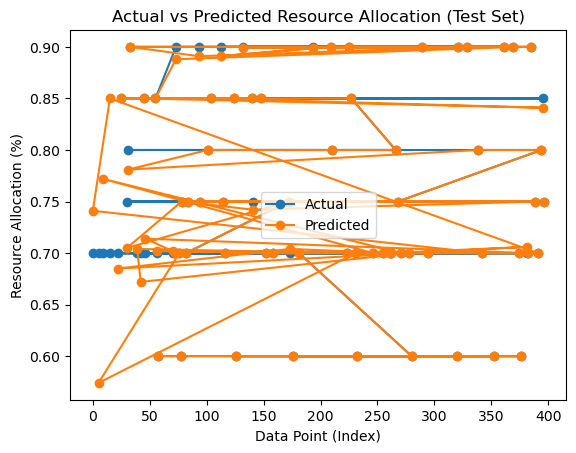

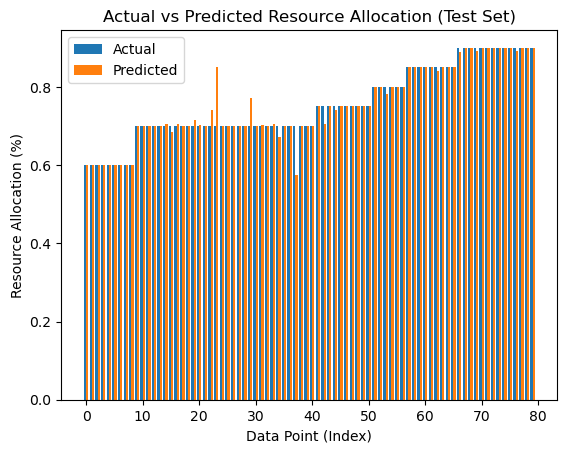